# Technocolabs Internship Project
## Prediction of Blood Donation for Future Expectancy
## Author- Manish Gautam


In [1]:
#import some essential libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#loading my csv file using pandas

df = pd.read_csv("transfusion.csv")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
df.shape

(748, 5)

# EDA-Exploratory Data Analysis

In [4]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [5]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
df = df.rename({'whether he/she donated blood in March 2007':"target"},axis=1)

In [7]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


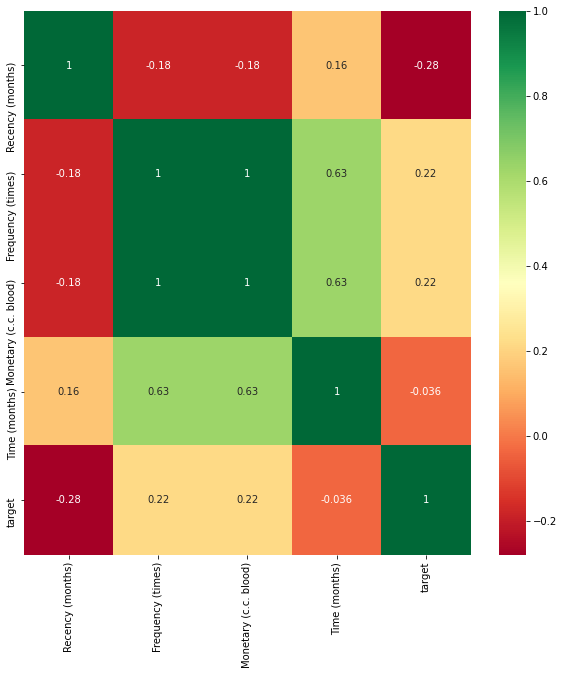

In [8]:
plt.figure(figsize=(10,10))
corrmat = df.corr()
top_feat = corrmat.index
g=sns.heatmap(df[top_feat].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:xlabel='target', ylabel='Monetary (c.c. blood)'>

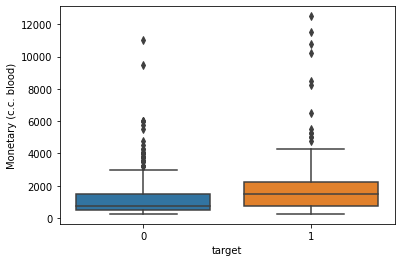

In [9]:
sns.boxplot(x="target",y=df['Monetary (c.c. blood)'],data=df)

In [10]:
df["Monetary (c.c. blood)"] = np.log10(df['Monetary (c.c. blood)'])

In [11]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,4.096910,98,1
1,0,13,3.511883,28,1
2,1,16,3.602060,35,1
3,2,20,3.698970,45,1
4,1,24,3.778151,77,0


<AxesSubplot:xlabel='target', ylabel='Monetary (c.c. blood)'>

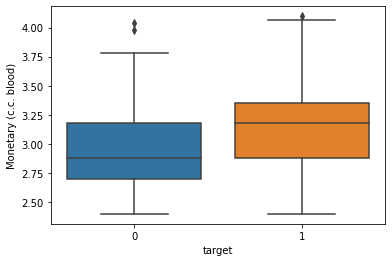

In [12]:
sns.boxplot(x="target",y=df['Monetary (c.c. blood)'],data=df)

c:\techno\technoc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

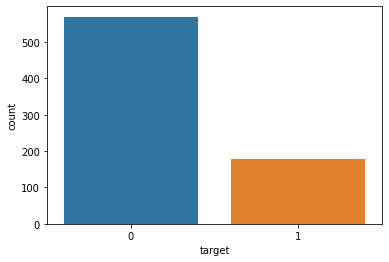

In [13]:
sns.countplot('target',data=df)

In [14]:
x = df.iloc[:,:4].values
x


array([[ 2.        , 50.        ,  4.09691001, 98.        ],
       [ 0.        , 13.        ,  3.51188336, 28.        ],
       [ 1.        , 16.        ,  3.60205999, 35.        ],
       ...,
       [23.        ,  3.        ,  2.87506126, 62.        ],
       [39.        ,  1.        ,  2.39794001, 39.        ],
       [72.        ,  1.        ,  2.39794001, 72.        ]])

In [15]:
y = df.iloc[:,-1].values
y

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Training of data

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [17]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(verbosity=2, max_time_mins=10)
tpot.fit(x_train, y_train)
print(tpot.score(x_test, y_test))

c:\techno\technoc\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7859943977591037

Generation 2 - Current best internal CV score: 0.7859943977591037

Generation 3 - Current best internal CV score: 0.7893697478991596

Generation 4 - Current best internal CV score: 0.7943697478991597

Generation 5 - Current best internal CV score: 0.7993977591036415

Generation 6 - Current best internal CV score: 0.8010784313725491

Generation 7 - Current best internal CV score: 0.8094397759103641

Generation 8 - Current best internal CV score: 0.8094397759103641

10.00 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: MLPClassifier(PCA(input_matrix, iterated_power=2, svd_solver=randomized), alpha=0.0001, learning_rate_init=0.01)
0.8066666666666666


In [18]:
tpot.fitted_pipeline_


Pipeline(steps=[('pca', PCA(iterated_power=2, svd_solver='randomized')),
                ('mlpclassifier', MLPClassifier(learning_rate_init=0.01))])

In [21]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(learning_rate_init=0.01,alpha=0.001)
mlp.fit(x_train,y_train)

MLPClassifier(alpha=0.001, learning_rate_init=0.01)

In [22]:
mlp.score(x_test,y_test)

0.8266666666666667

In [23]:
import pickle


In [24]:
f = open("mlp.pkl", "wb")
pickle.dump(mlp,f)